# Exploratory Data Analysis - DELA

## 1. Introduction

### 1.1 About this document
This document is going to look into the data provided by DELA. This project is going to be conducted within the field of education meaning that the data provided is either publicly available or previously disclosed.

### 1.2 Goal
DELA has send us a dataset that we can use to conduct our EDA. We run this analysis to find out if there are trends, outliers and clusters present within this dataset. This can help us to determine the possibilities, opportunities, limitations and boundaries of the current dataset.

## 2. Preperations
Before we can start with analysing the data, we need to do a few preperations first.

### 2.1 Importing Libraries
In order to work the the provided data, we need to load it in first. Pandas is a great tool for accomplishing this. It also has built in integration with matplotlib for easy plotting of data, which helps to visualize the data in graphs and charts. Seaborn is similar to matplotlib but has more enriched feature set.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2.2 Importing Data

Firstly, we want a quick glimpse of the data provided and get a basic understanding of the amount of entries we are working with.

In [2]:
df = pd.read_csv('data.csv', sep=';')
df.describe(include='all')

,omschrijving,mld_dat,Aantal
count,25408,25408,25408.00000
unique,20,1460,NaN
top,Ondernemersgebied,25/03/2020,NaN
freq,1460,20,NaN
mean,NaN,NaN,4.51106
std,NaN,NaN,2.62574
min,NaN,NaN,1.00000
25%,NaN,NaN,3.00000
50%,NaN,NaN,4.00000
75%,NaN,NaN,6.00000


In [3]:
df.head(5)

,omschrijving,mld_dat,Aantal
0,Arnhem,31/12/2020,4
1,Breda,31/12/2020,5
2,Den Bosch,31/12/2020,8
3,Eindhoven,31/12/2020,9
4,Haaglanden,31/12/2020,5


The data seems to consist of 25408 rows, devided into 3 columns. Things of note are that 'omschrijving' only has 20 unique values, containing mostly regional data (with trailing whitespaces) and 'mld_dat' follows the structure of DD/MM/YY.

### 2.3 Exploring the data

The first logical step after loading in the data is doing so quick validations. We start off by checking for possible null values.

In [4]:
df.isnull().sum()

omschrijving    0
mld_dat         0
Aantal          0
dtype: int64

It can be concluded that no null values are present within the dataset. Because we want to keep our dataset as small as possible, we want to make sure we don't have any duplicate data, as they are redundant.

In [5]:
df.duplicated().sum()

0

It appears that the data has no duplicate entries which allows us to safely dive deeper into the research. Next up is to validate of the columns are represented in the correct type.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25408 entries, 0 to 25407
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   omschrijving  25408 non-null  object
 1   mld_dat       25408 non-null  object
 2   Aantal        25408 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 595.6+ KB


It seems like the date is interpeted as an object rather than a datetime. This is also a good opportunity to solve the issues noted before about the unaccesarry trailing whitespaces in the 'omschrijving'.

Because our team works with consists of international members as well, we also have made the decision to rename the columns to their english counterparts for an easier workflow.

In [7]:
df.columns = ['region', 'date', 'amount']
df['date'] = pd.to_datetime(df['date'])
df["region"] = df["region"].str.strip()
df.head(5)

,region,date,amount
0,Arnhem,2020-12-31,4
1,Breda,2020-12-31,5
2,Den Bosch,2020-12-31,8
3,Eindhoven,2020-12-31,9
4,Haaglanden,2020-12-31,5


Now that the date is in the proper format, we can see the timespan of this data collection.

In [8]:
print("Min = ", df["date"].min(), "Max = ", df["date"].max())

Min =  2017-01-02 00:00:00 Max =  2020-12-31 00:00:00


What we can observe is that the data spans from 2017-01-02 until the end of year 2020 (2020-12-31).

## 3. Analyzing relationships

### 3.1 The amount of deaths each day across all regions

Firstly, the data allowed for clear visualization for the amount of deaths per day across all regions. The X axis consists of the days within the timespan of the data provided (2017-2020) and the Y axis describes the amount of deaths recorded that day.

<AxesSubplot:xlabel='date'>

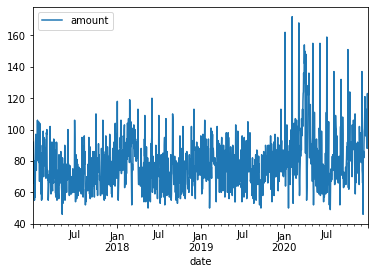

In [9]:
df_amount_by_date = df.groupby('date', as_index = False).sum()
df_amount_by_date.plot(x='date', y='amount')

Unfortunately, this does not provide with clear insight for a prominent correlation between a specific day and the amount of deaths recorded. Spikes in deaths can be seen from January-February onwards with a peak at the beginning of year 2020.

### 3.2 The amount of deaths in total each month

The previous visualization did not provide a good look on what the data expresses. In order to better present the findings, a metric that was looked at was the amount of deaths in total each month.

In [10]:
df_groupby_month = df.groupby([
    df['date'].dt.year.rename('year'),
    df['date'].dt.month.rename('month')]).sum().reset_index()

<AxesSubplot:xlabel='month'>

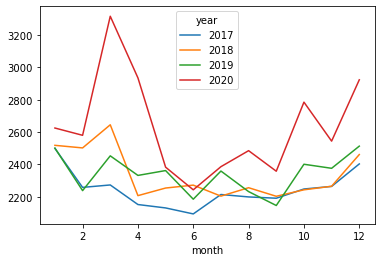

In [11]:
df_groupby_month.pivot(index='month', columns='year', values='amount').plot()

Now with this visualization, it can be clearly seen that around September 2019 an exponential growth of deaths can be seen. Furthermore, the trend started at the end of 2019 continues onwards to 2020 where a spike in deaths can be observed in March, followed by a drop in June and a growth back up from July forward. A commonality between the four years is the slight (or sudden) spike in deaths in March and an increase in October-December.

### 3.3 The total amount of deaths in each region

Another metric of interest if the amount of deaths in each region.

In [12]:
df_amount_in_region = df.groupby('region', as_index = False)['amount'].sum()
df_amount_in_region

,region,amount
0,Amersfoort-Flevoland,132
1,Arnhem,6197
2,Breda,6360
3,Den Bosch,6183
4,Eindhoven,7431
5,Haaglanden,4165
6,Kempenland,6268
7,Midden Limburg,6216
8,Midden Nederland,5929
9,NOORD,2474


It is observed that from the data provided the most deaths occurred in "Ondernemersgebied" with 13939 and the least in "Amersfoort-Flevoland" with 132. A plot is created to better illustrate the findings found from the dataset.

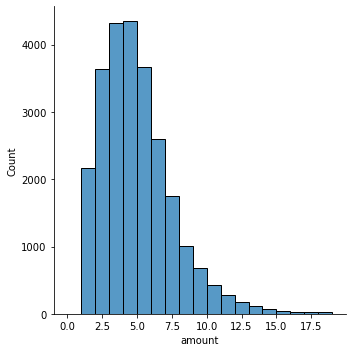

In [48]:
sns.displot(df, x='amount', bins=range(len(df_amount_in_region['region'])))

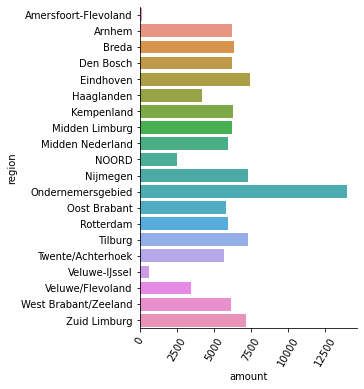

In [20]:
sns.catplot(kind='bar', y ='region', x='amount', data=df_amount_in_region)
plt.xticks(rotation=60)
plt.show()

### 3.4 The amount of deaths in Breda over the years

In [14]:
df_breda_series = df['region'] == "Breda"
df_breda_series = df[df_breda_series]
df_breda_series

,region,date,amount
1,Breda,2020-12-31,5
19,Breda,2020-12-30,3
37,Breda,2020-12-29,3
54,Breda,2020-12-28,5
71,Breda,2020-12-27,2
...,...,...,...
25324,Breda,2017-06-01,5
25341,Breda,2017-05-01,7
25358,Breda,2017-04-01,4
25375,Breda,2017-03-01,6


In [15]:
df_breda_amount = df_breda_series.groupby([
    df['date'].dt.year.rename('year'),
    df['date'].dt.month.rename('month')]).sum().reset_index()

<AxesSubplot:xlabel='month'>

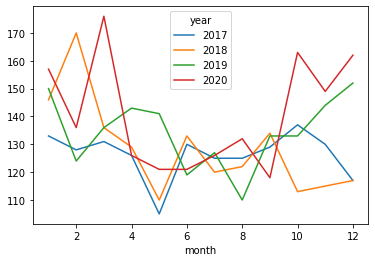

In [16]:
df_breda_amount.pivot(index='month', columns='year', values='amount').plot()

### 3.5 The total amount of deaths for each day of the week

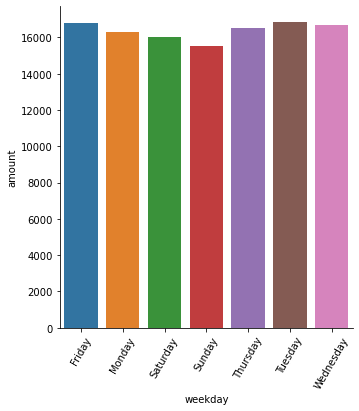

In [17]:
df_weekdays_amount = df.groupby(df['date'].dt.strftime("%A").rename('weekday'))['amount'].sum().reset_index()
sns.catplot(data=df_weekdays_amount, kind='bar', y='amount', x='weekday', ci=None)
plt.xticks(rotation=60)
plt.show()

### 3.6 The amount of deaths each day, within each region, since the year 2020

array([[<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
        <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
        <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
        <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
        <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
        <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>]],
      dtype=object)

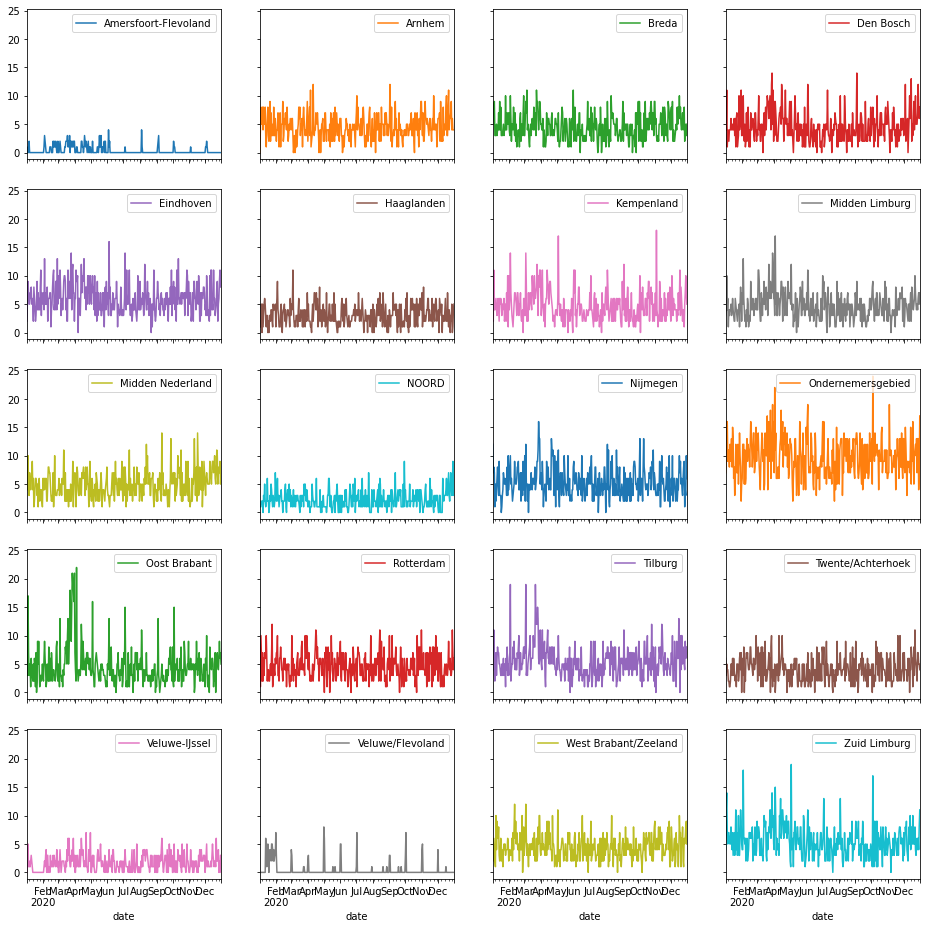

In [18]:
df_region_last_year = df[df['date'] > '1/1/2020']
df_region_last_year = df_region_last_year.groupby(['date', 'region'], as_index=False).sum()
df_region_last_year = df_region_last_year.pivot(index='date', columns='region', values='amount')
df_region_last_year.fillna(0).plot(subplots=True, sharex=True , sharey=True, figsize=(16,16), layout=(-1,4))